# New regimes of Josephson junction arrays

In [350]:
import sys
sys.path.insert(1, '/Users/adityagandotra/Documents/GitHub2/JunctionArray')
import JJArray as jja
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.sparse import bmat
from tqdm.notebook import tqdm
import scqubits as scq
import seaborn as sns

# Full Hamiltonian

In [316]:
N = 3
Ncut = 6

EC = np.full((N), 0.5)
EJ = np.full((N), 0.01)
EJb = 10
ECb = 0.5
phi = 0.

H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)

# Setup of the system by symmetry sectors

Generate unitary transformations for each symmetry sector

In [317]:
%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  2197


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

Sector 0= 741


  0%|          | 0/741 [00:00<?, ?it/s]

Sector 1= 728


  0%|          | 0/741 [00:00<?, ?it/s]

Sector 2= 728
Sum of sector dimensions =  2197
CPU times: user 51.6 ms, sys: 10.2 ms, total: 61.8 ms
Wall time: 58 ms


In [265]:
ph_list = np.linspace(0,1,20)

scan = {}
[scan.update({k:[]}) for k in range(N)]

for ph in tqdm(ph_list):
    
    H = jja.H_array(ph, N , Ncut, EJ, EC, EJb, ECb)
    evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,10)
    [scan[k].append(symmetric_data[k][0]) for k in range(N)]    

  0%|          | 0/20 [00:00<?, ?it/s]

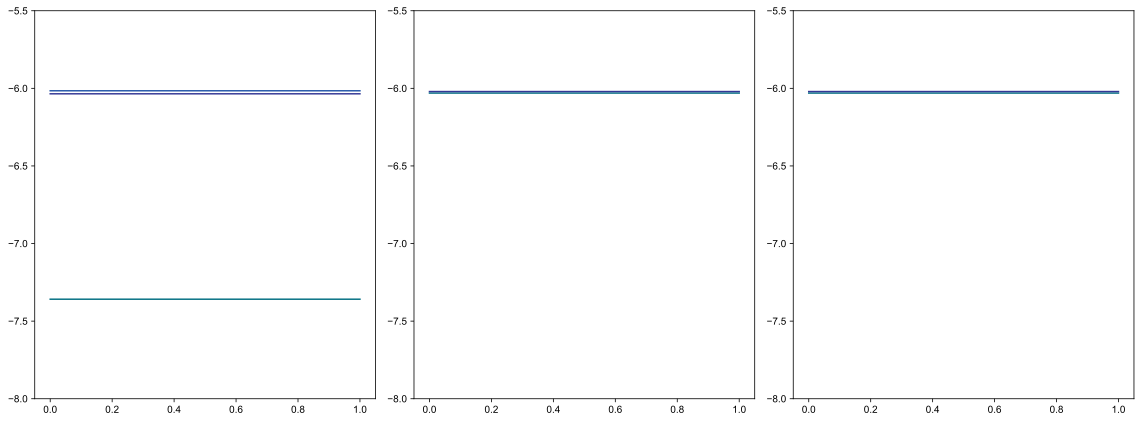

In [266]:
fig, ax = plt.subplots(1,N, figsize=(16,6))

[ax[r].plot(ph_list,np.array(scan[r])) for r in range(N)];
[ax[r].set_ylim([-8,-5.5]) for r in range(N)]
# [ax[r].set_xticks([]) for r in range(N)]

fig.tight_layout()

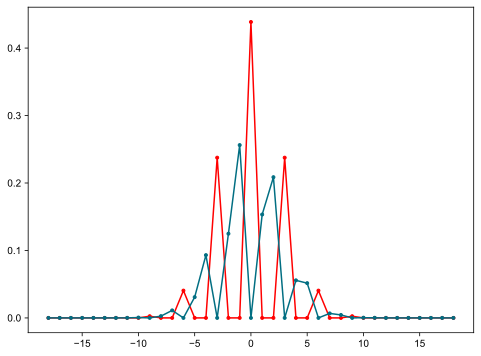

In [256]:
bs = jja.cartesian([np.arange(-Ncut,Ncut+1) for r in range(N)])
chrgs = np.array([np.sum(bs[r]) for r in range(len(bs))])

plt.figure(figsize=(8,6),dpi=100)

state = evecs[0]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

state = evecs[1]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'.-')

## Comparing to transmon spectrum

In [326]:
H = jja.H_array(0, N , Ncut, EJ, EC, EJb, ECb)
evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,18)

In [258]:
Ec_matrix2inv = (1/EC)*np.identity(3) + (1/ECb)*np.ones((3,3))
Ec_matrix = np.linalg.inv(Ec_matrix2inv)


tmon1 = scq.Transmon(EJ=EJb, EC=np.sum(Ec_matrix),ng=0, ncut=10)
tmon2 = scq.Transmon(EJ=EJb, EC=np.sum(Ec_matrix),ng=-np.sum(Ec_matrix[1])/np.sum(Ec_matrix), ncut=10)
tmon3 = scq.Transmon(EJ=EJb, EC=2*np.sum(Ec_matrix),ng=0, ncut=10)

In [259]:
tmon_Ham = qt.Qobj(tmon1.hamiltonian())
tmon_evals, tmon_evecs = tmon_Ham.eigenstates()
tmon_Ham2 = qt.Qobj(tmon2.hamiltonian())
tmon_evals2, tmon_evecs2 = tmon_Ham2.eigenstates()
tmon_Ham3 = qt.Qobj(tmon3.hamiltonian())
tmon_evals3, tmon_evecs3 = tmon_Ham3.eigenstates()

In [260]:
correctedtmon_evals2 = tmon_evals2 - 4*np.sum(Ec_matrix)*(np.sum(Ec_matrix[0])/np.sum(Ec_matrix))**2 + 4*Ec_matrix[0][0]

In [261]:
correctedtmon_evals2[0]

-6.025398081996927

In [262]:
plt.figure(figsize=(10,8), dpi=100)
plt.hlines(tmon_evals[0:3],0, 100, color='black', label='Transmon ng = 0') 
plt.hlines(correctedtmon_evals2[0:3],0, 100, color='red', label='Transmon ng = $-\varepsilon_r/\varepsilon$') 
plt.plot(evals, '.')
plt.legend()

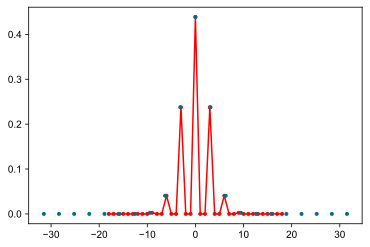

In [245]:
state = evecs[0]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

xlist = np.linspace(-len(np.array(tmon_evecs[0]))*1.5, len(np.array(tmon_evecs[0]))*1.5, len(np.array(tmon_evecs[0])))
plt.plot(xlist, np.abs(np.array(tmon_evecs[0]))**2,'.')

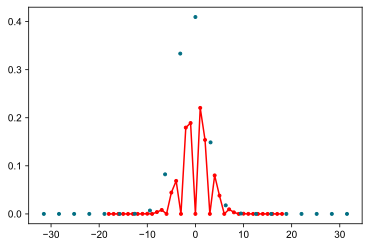

In [246]:
state = evecs[6]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

xlist = np.linspace(-len(np.array(tmon_evecs2[0]))*1.5, len(np.array(tmon_evecs2[0]))*1.5, len(np.array(tmon_evecs2[0])))
plt.plot(xlist, np.abs(np.array(tmon_evecs2[0]))**2,'.')

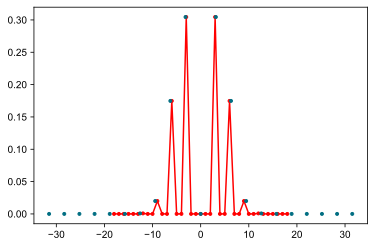

In [173]:
state = evecs[13]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

xlist = np.linspace(-len(np.array(tmon_evecs[1]))*1.5, len(np.array(tmon_evecs[1]))*1.5, len(np.array(tmon_evecs[1])))
plt.plot(xlist, np.abs(np.array(tmon_evecs[1]))**2,'.')

In [219]:
#plt.plot(evecs[0])
#plt.plot(np.array(tmon_evecs[0]))

## Check block-diagonal form of the Hamiltonian in the symmetric basis (use small N, Ncut for safety)

In [249]:
N = 3
Ncut = 2

EC = np.full((N), 0.5)
EJ = np.full((N), 0.00)
EJb = 10
ECb = 0.5
phi = 0.

H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)

%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  125


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Sector 0= 45


  0%|          | 0/45 [00:00<?, ?it/s]

Sector 1= 40


  0%|          | 0/45 [00:00<?, ?it/s]

Sector 2= 40
Sum of sector dimensions =  125
CPU times: user 130 ms, sys: 7.88 ms, total: 138 ms
Wall time: 46.2 ms


In [250]:
H_V = bmat([[V[i].dag()*H*V[j] for j in range(N)] for i in tqdm(range(N))])

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0.5, 1.0, 'H in the symmetric basis')

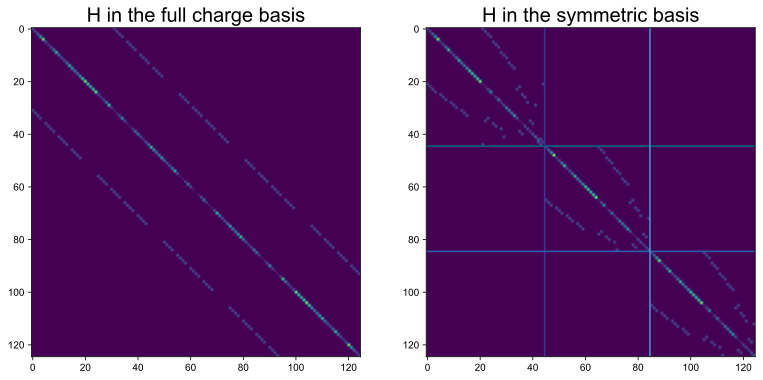

In [251]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,13))


ax1.imshow(np.abs(H.full()))
ax1.set_title('H in the full charge basis', size = 20)

ax2.imshow(np.abs(H_V.toarray()))

sm = V[0].shape[1]
for i in range(1,N):
    ax2.plot(np.arange(0,H.shape[0]),(sm-0.5)*np.ones(H.shape[0]))
    ax2.plot((sm-0.5)*np.ones(H.shape[0]),np.arange(0,H.shape[0]))
    sm = sm + V[i].shape[1]
    
ax2.set_title('H in the symmetric basis', size = 20)

## Computing matrix elements

In [313]:
n1_op = jja.Charge_j(0,3,6)
n2_op = jja.Charge_j(1,3,6)

In [311]:
N3_groundState = qt.Qobj(evecs[0])

In [308]:
np.array(N3_groundState.dag()), evecs[0]

(array([[4.17343946e-06+7.45651106e-05j, 3.21596959e-08+5.74583938e-07j,
         5.15745913e-11+9.21461833e-10j, ...,
         5.15745921e-11+9.21461830e-10j, 3.21596959e-08+5.74583938e-07j,
         4.17343946e-06+7.45651106e-05j]]),
 array([4.17343946e-06-7.45651106e-05j, 3.21596959e-08-5.74583938e-07j,
        5.15745913e-11-9.21461833e-10j, ...,
        5.15745921e-11-9.21461830e-10j, 3.21596959e-08-5.74583938e-07j,
        4.17343946e-06-7.45651106e-05j]))

In [391]:
def matrixElementSweep(op,level1,level2, Ebj_range, Ej_range, Ec,N,Ncut):
    sweep = []
    for Ebj in Ebj_range:
        Ej_sweep = []
        for Ej in Ej_range:
            EC = np.full((N), Ec)
            EJ = np.full((N), Ej)
            #print(Ebj)
            #print(Ej)
            H = jja.H_array(0, N , Ncut, EJ, EC, Ebj, Ec)
            evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,18)
            ket = qt.Qobj(evecs[level2])
            bra1 = qt.Qobj(evecs[level1])
            bra = bra1.dag()
            #print(ket.type)
            #print(bra.type)
            Ej_sweep.append(op.matrix_element(bra, ket))
        sweep.append(Ej_sweep)
    return sweep

def plotSweep(sweep, op, ket1, ket2):
    plt.figure(figsize=(10,8), dpi=100)
    ax = sns.heatmap(np.abs(sweep), cmap = 'mako')
    ax.invert_yaxis()
    plt.xlabel('$E_J^a$', fontsize = 14)
    plt.ylabel('$E_J^b$', fontsize=14)
    #ax.set_yticklabels(Ejs)
    #ax.set_xticklabels(Ebjs)
    plt.title(r'Matrix element $\langle$' + str(ket1) + '|' + op +  '|' + str(ket2) + r'$\rangle$', fontsize=16)

    plt.show()

In [359]:
EbJs = np.linspace(0.01,5,20)
Ejs = np.linspace(0.01,5,20)
n1_01_matrix = matrixElementSweep(n1_op,0,1,EbJs, Ejs, 0.5,3,6)

In [337]:
n2_op.matrix_element(N3_groundState.dag(), N3_groundState)

(3.3989000262314167e-16+1.0844875502365956e-19j)

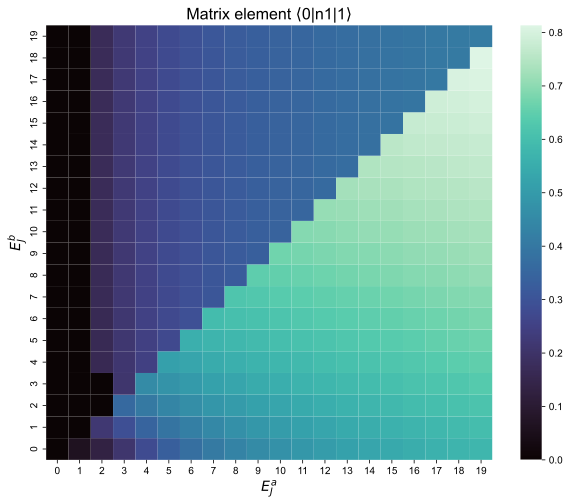

In [392]:
EbJs = np.linspace(0.01,5,20)
Ejs = np.linspace(0.01,5,20)
plotSweep(n1_01_matrix, 'n1', 0,1)

In [365]:
n1_02_matrix = matrixElementSweep(n1_op,0,2,EbJs, Ejs, 0.5,3,6)
n1_03_matrix = matrixElementSweep(n1_op,0,3,EbJs, Ejs, 0.5,3,6)
n1_04_matrix = matrixElementSweep(n1_op,0,4,EbJs, Ejs, 0.5,3,6)
n1_05_matrix = matrixElementSweep(n1_op,0,5,EbJs, Ejs, 0.5,3,6)
n1_06_matrix = matrixElementSweep(n1_op,0,6,EbJs, Ejs, 0.5,3,6)

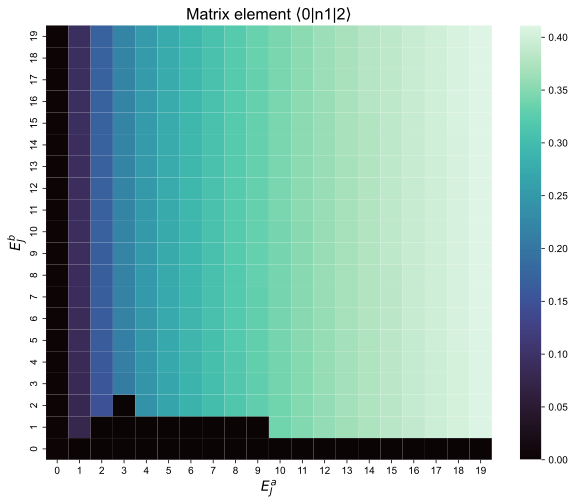

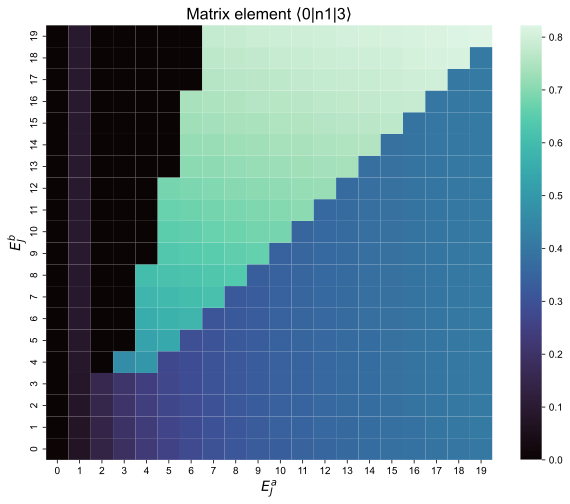

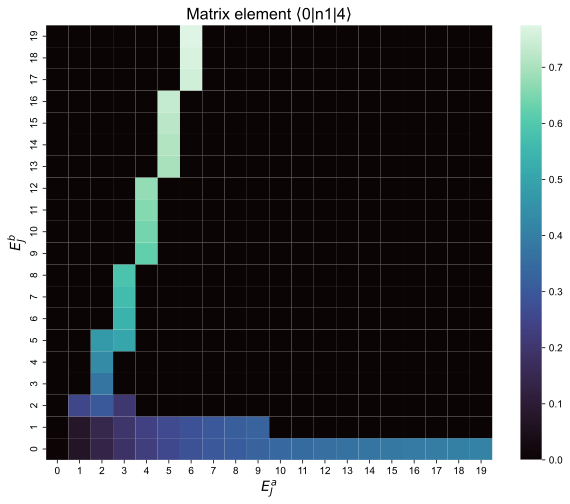

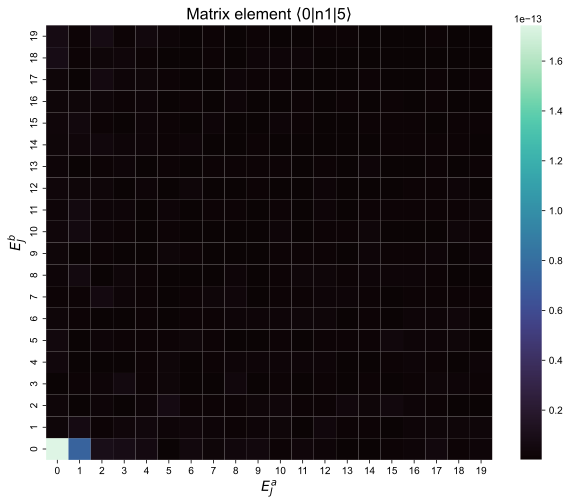

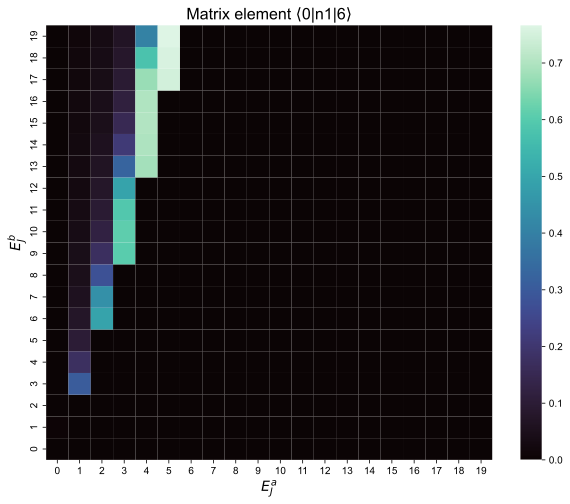

In [375]:
plotSweep(n1_02_matrix, 'n1', 0,2)
plotSweep(n1_03_matrix, 'n1', 0,3)
plotSweep(n1_04_matrix, 'n1', 0,4)
plotSweep(n1_05_matrix, 'n1', 0,5)
plotSweep(n1_06_matrix, 'n1', 0,6)

In [378]:
EbJs = np.linspace(0.01,20,10)
Ejs = np.linspace(0.01,20,10)
n2_01_matrix = matrixElementSweep(n2_op,0,1,EbJs, Ejs, 0.5,3,6)
n2_02_matrix = matrixElementSweep(n2_op,0,2,EbJs, Ejs, 0.5,3,6)
n2_03_matrix = matrixElementSweep(n2_op,0,3,EbJs, Ejs, 0.5,3,6)
n2_04_matrix = matrixElementSweep(n2_op,0,4,EbJs, Ejs, 0.5,3,6)
n2_05_matrix = matrixElementSweep(n2_op,0,5,EbJs, Ejs, 0.5,3,6)
n2_06_matrix = matrixElementSweep(n2_op,0,6,EbJs, Ejs, 0.5,3,6)

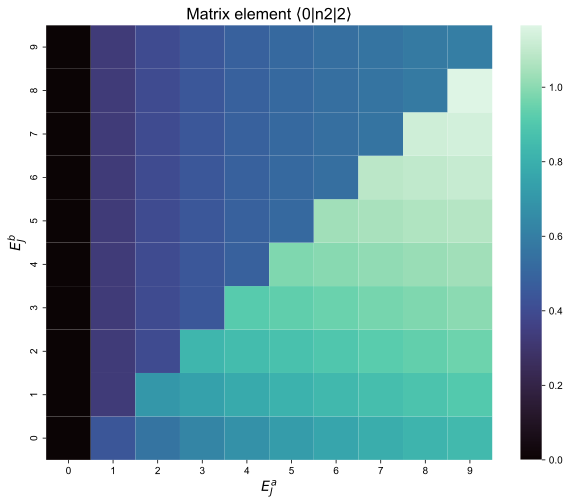

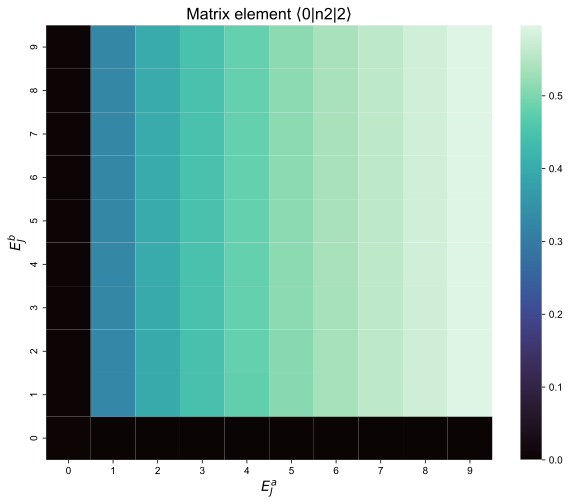

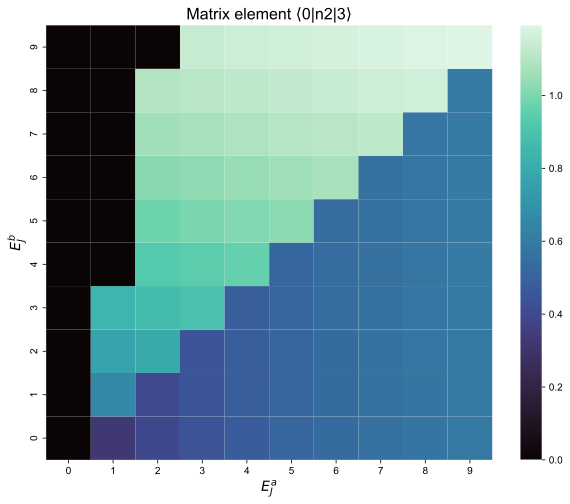

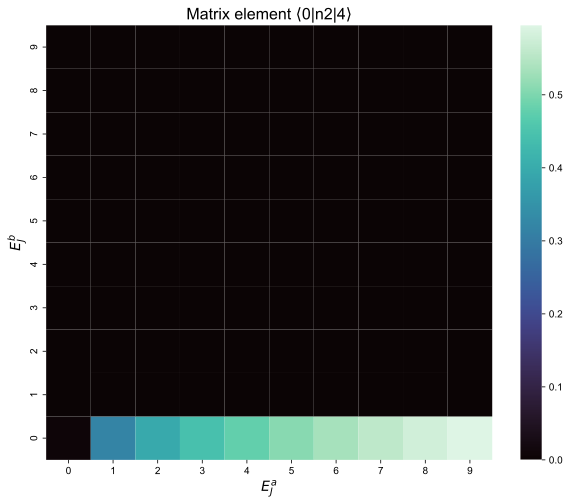

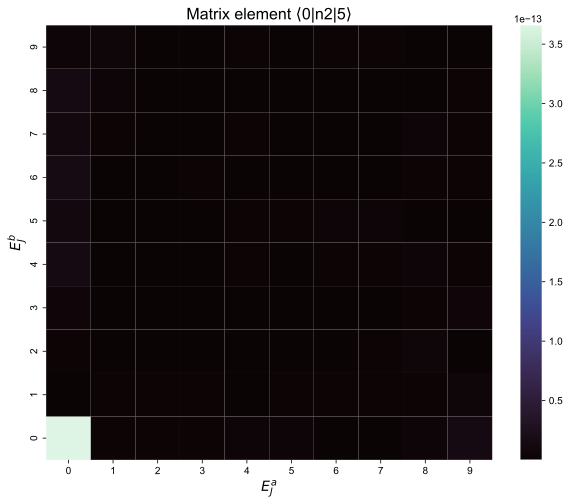

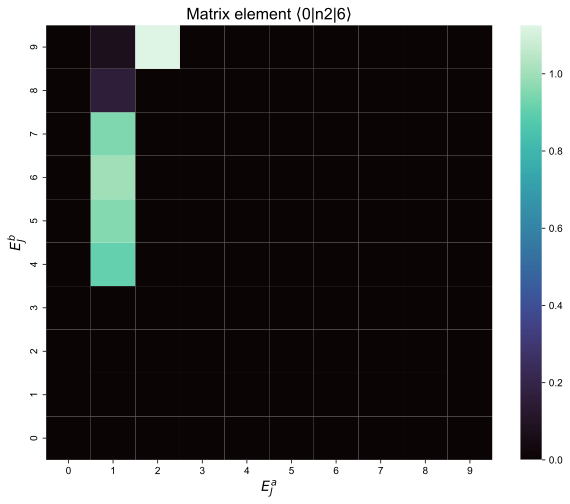

In [379]:
plotSweep(n2_01_matrix, 'n2', 0,2)
plotSweep(n2_02_matrix, 'n2', 0,2)
plotSweep(n2_03_matrix, 'n2', 0,3)
plotSweep(n2_04_matrix, 'n2', 0,4)
plotSweep(n2_05_matrix, 'n2', 0,5)
plotSweep(n2_06_matrix, 'n2', 0,6)

In [380]:
EbJs = np.linspace(0.01,5,10)
Ejs = np.linspace(0.01,5,10)
n1_12_matrix = matrixElementSweep(n1_op,1,2,EbJs, Ejs, 0.5,3,6)
n1_13_matrix = matrixElementSweep(n1_op,1,3,EbJs, Ejs, 0.5,3,6)
n1_14_matrix = matrixElementSweep(n1_op,1,4,EbJs, Ejs, 0.5,3,6)
n1_15_matrix = matrixElementSweep(n1_op,1,5,EbJs, Ejs, 0.5,3,6)
n1_16_matrix = matrixElementSweep(n1_op,1,6,EbJs, Ejs, 0.5,3,6)

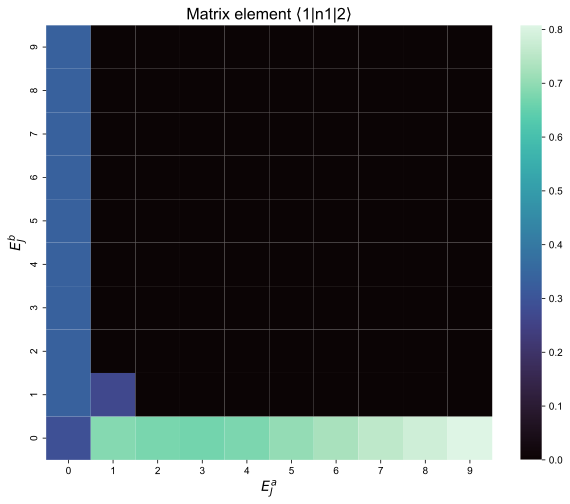

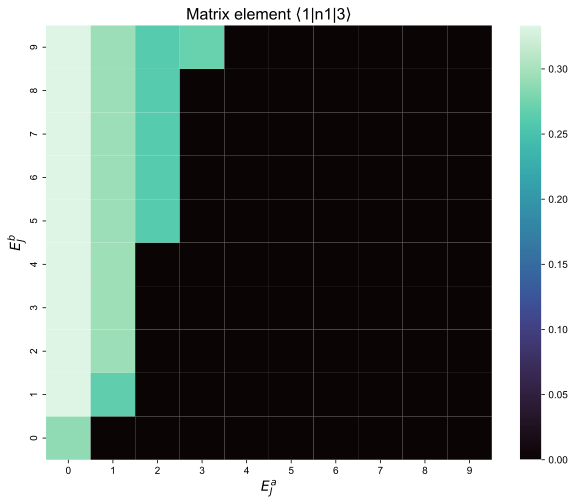

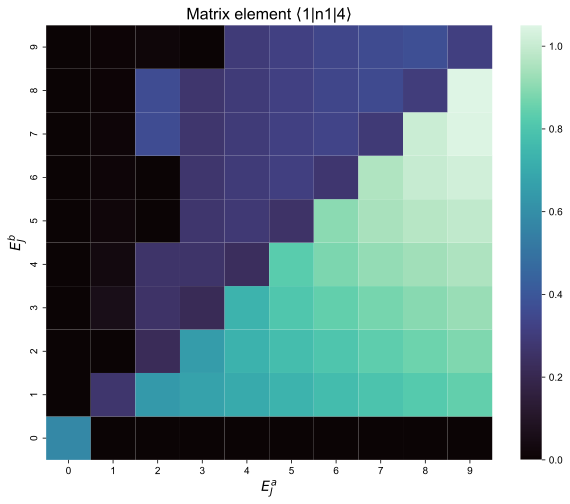

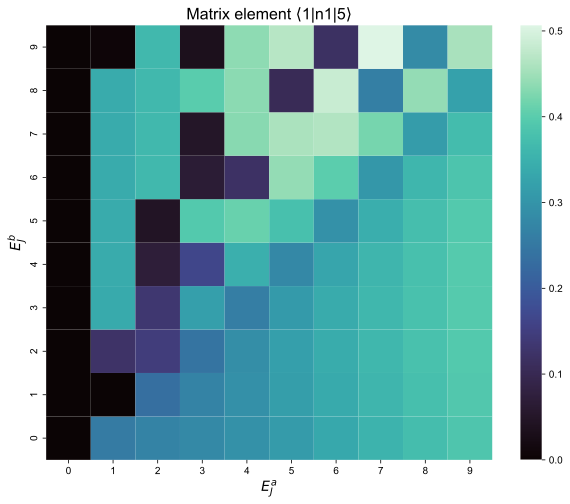

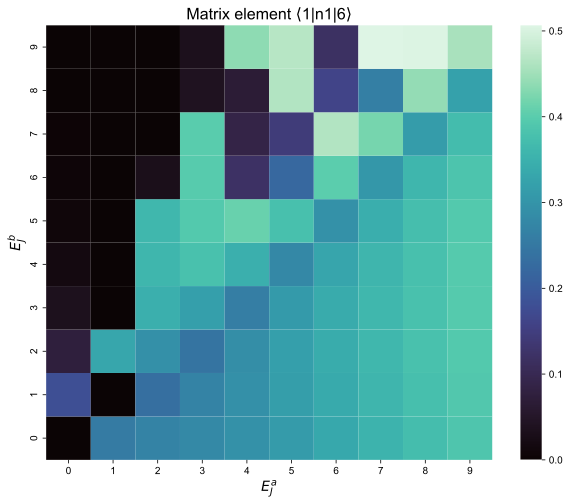

In [381]:
plotSweep(n1_12_matrix, 'n1', 1,2)
plotSweep(n1_13_matrix, 'n1', 1,3)
plotSweep(n1_14_matrix, 'n1', 1,4)
plotSweep(n1_15_matrix, 'n1', 1,5)
plotSweep(n1_16_matrix, 'n1', 1,6)

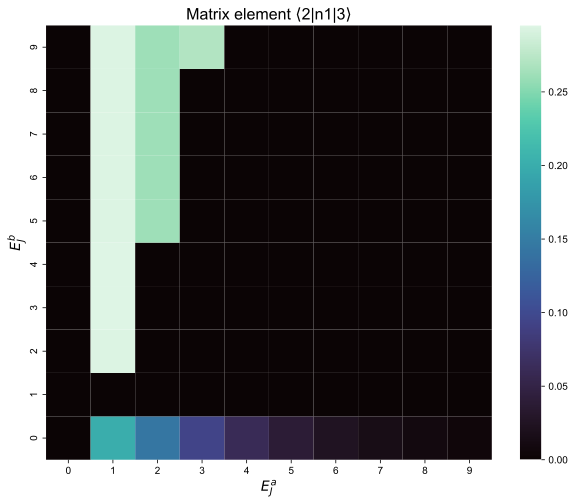

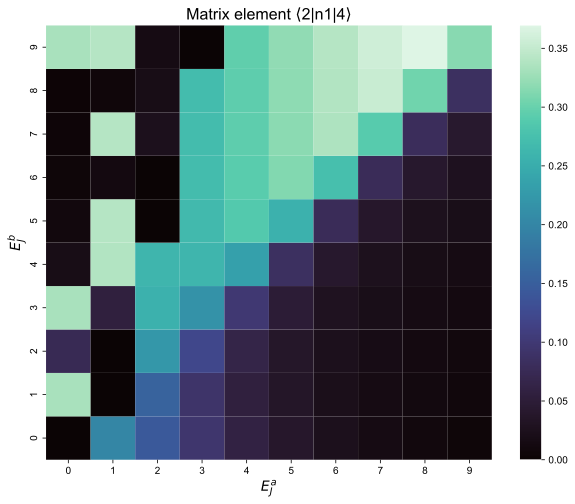

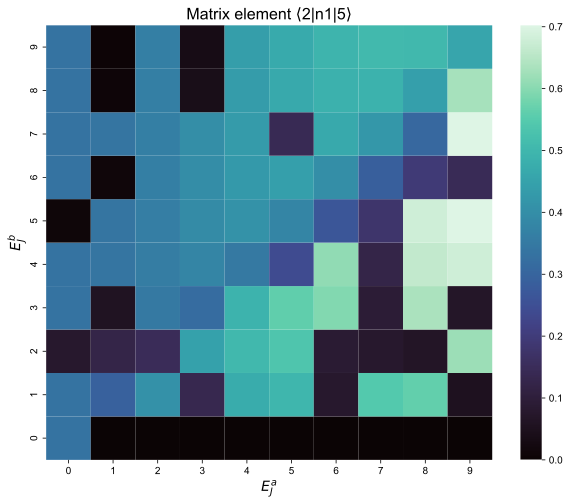

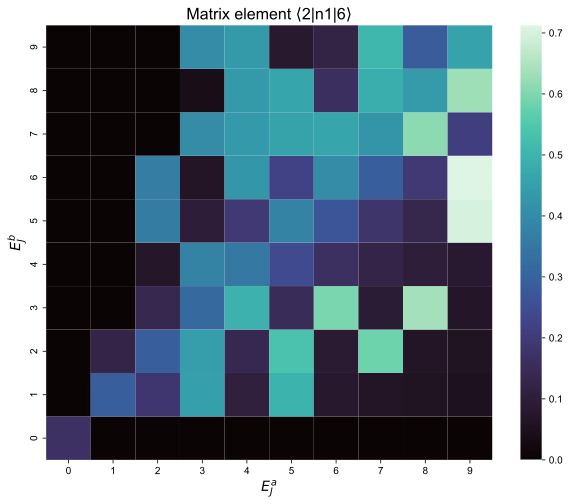

In [382]:
EbJs = np.linspace(0.01,5,10)
Ejs = np.linspace(0.01,5,10)
n1_23_matrix = matrixElementSweep(n1_op,2,3,EbJs, Ejs, 0.5,3,6)
n1_24_matrix = matrixElementSweep(n1_op,2,4,EbJs, Ejs, 0.5,3,6)
n1_25_matrix = matrixElementSweep(n1_op,2,5,EbJs, Ejs, 0.5,3,6)
n1_26_matrix = matrixElementSweep(n1_op,2,6,EbJs, Ejs, 0.5,3,6)

plotSweep(n1_23_matrix, 'n1', 2,3)
plotSweep(n1_24_matrix, 'n1', 2,4)
plotSweep(n1_25_matrix, 'n1', 2,5)
plotSweep(n1_26_matrix, 'n1', 2,6)

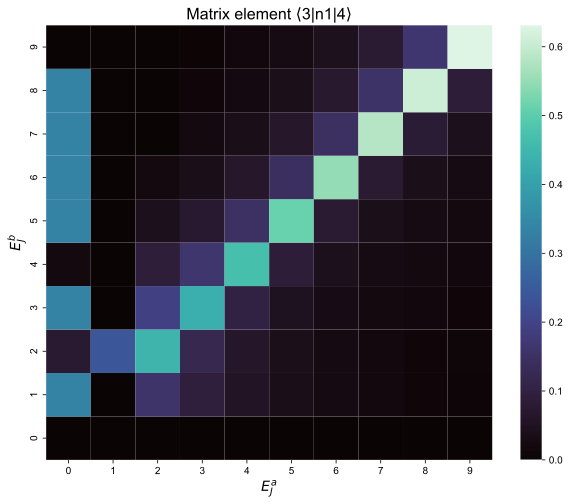

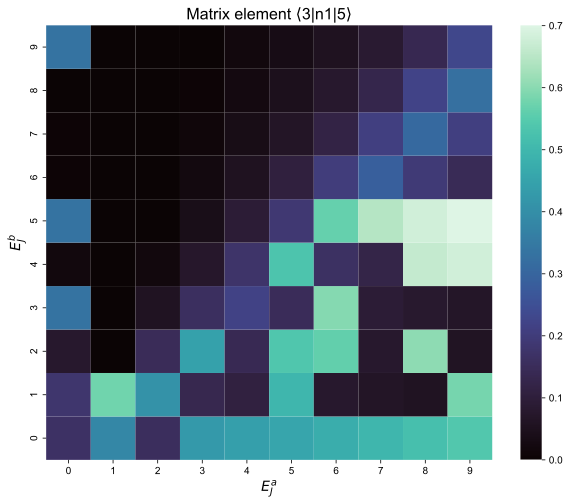

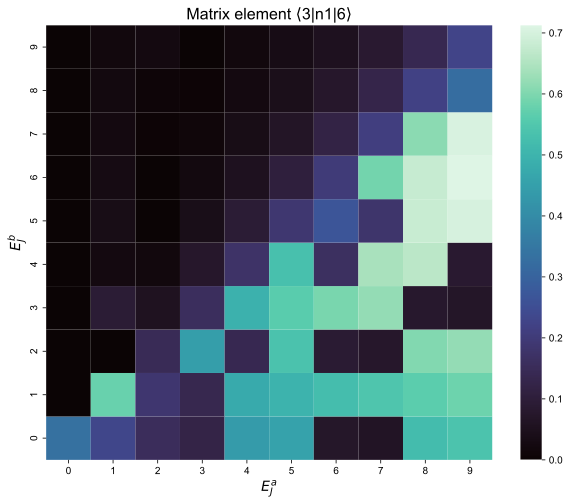

In [383]:
EbJs = np.linspace(0.01,5,10)
Ejs = np.linspace(0.01,5,10)
n1_34_matrix = matrixElementSweep(n1_op,3,4,EbJs, Ejs, 0.5,3,6)
n1_35_matrix = matrixElementSweep(n1_op,3,5,EbJs, Ejs, 0.5,3,6)
n1_36_matrix = matrixElementSweep(n1_op,3,6,EbJs, Ejs, 0.5,3,6)

plotSweep(n1_34_matrix, 'n1', 3,4)
plotSweep(n1_35_matrix, 'n1', 3,5)
plotSweep(n1_36_matrix, 'n1', 3,6)

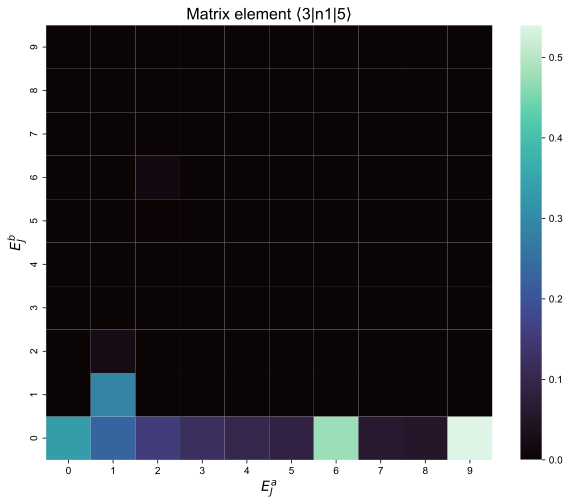

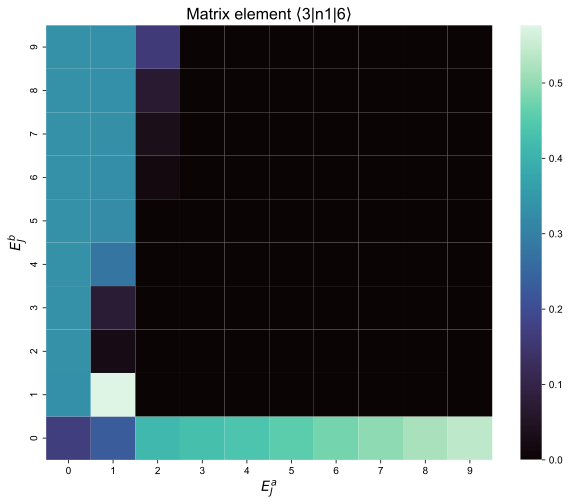

In [384]:
EbJs = np.linspace(0.01,5,10)
Ejs = np.linspace(0.01,5,10)

n1_45_matrix = matrixElementSweep(n1_op,4,5,EbJs, Ejs, 0.5,3,6)
n1_46_matrix = matrixElementSweep(n1_op,4,6,EbJs, Ejs, 0.5,3,6)

plotSweep(n1_45_matrix, 'n1', 3,5)
plotSweep(n1_46_matrix, 'n1', 3,6)

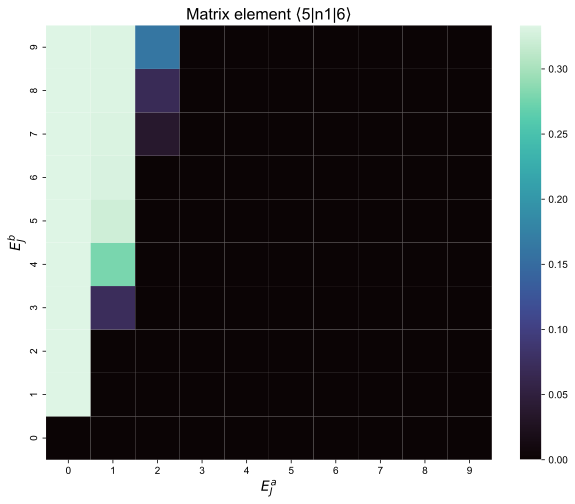

In [385]:

n1_56_matrix = matrixElementSweep(n1_op,5,6,EbJs, Ejs, 0.5,3,6)

plotSweep(n1_56_matrix, 'n1', 5,6)